# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Ознакомление с полученными данными.

In [33]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


'x'

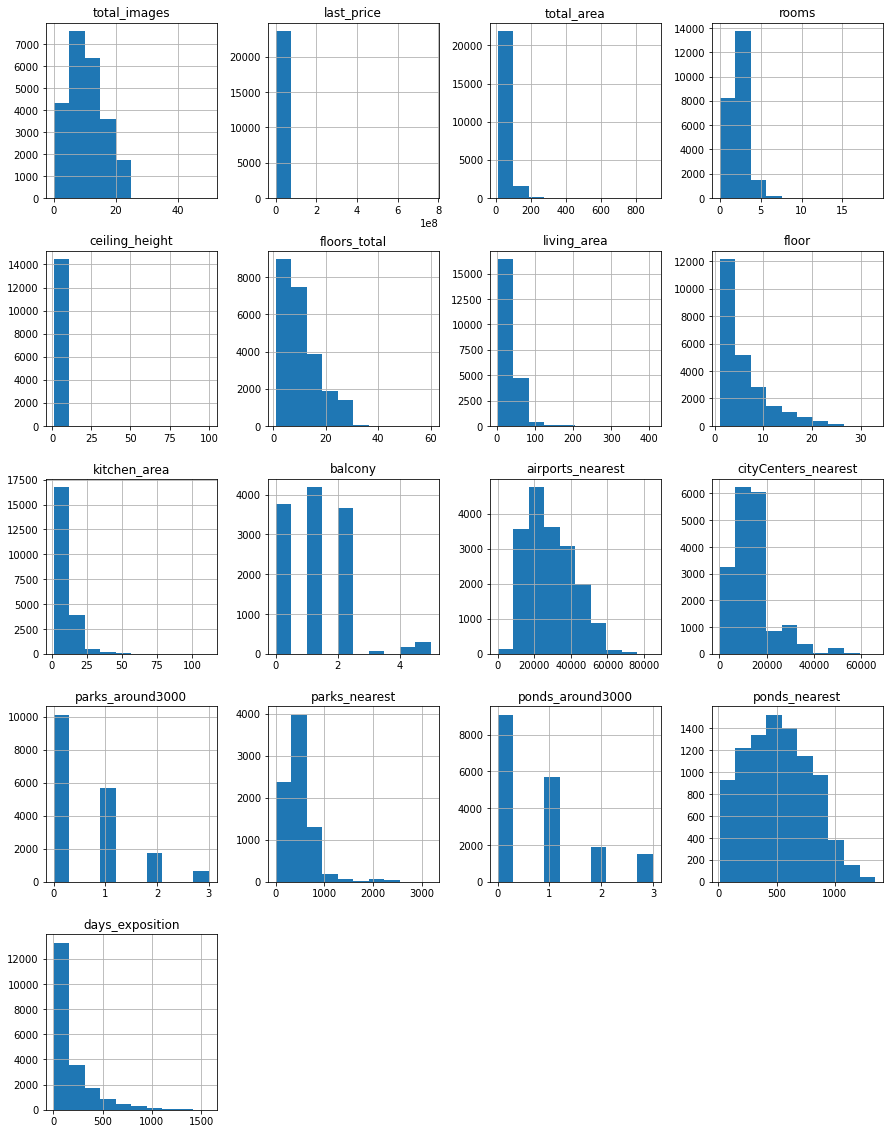

In [34]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

display(data.head(15))

data.hist(figsize = (15,20))

'x'

При знакомстве с данными обращает внимание следующее:

- Большое количество пропусков в столбце ceiling_height, чтобы это не отразилось на результате нужно это исправить
- Большое количество пропусков в столбце is_apartment, здесь возможно причина в специфике формулировки
- На графиках видны показатели 0, которые вероятно аномальные, к примеру в столбце days_exposition, airports_nearst

Соответственно, необходимо проверить данные и избавить их от пропусков, аномалий и явных дубликатов.

### Предобработка данных

# Поиск пропусков и анамальных значений. При необходимости замена типов данных и другие подготовительные работы.

In [35]:
data.info()

'x'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

'x'

In [36]:
#проверим количество пропуском в столбцах

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Сразу можно отметить - данные нуждаются в кооррекции. Например: большое количество пропусков, они могли возникнуть из-за отстутствия в объекте балкона или парка. Или же это техническая ошибка. 
Также есть ошибки в типах данных. Например, в коррекции типа нуждаются: first_day_exposition, floors_total, days_exposition 

In [37]:
#приведем в рабочий вид некоторые столбцы, где требуется только заменить пропуск и тип данных

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['floors_total'] = data['floors_total'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['last_price'] = data['last_price'].astype('int')
data['is_apartment'] = data['is_apartment'].fillna('Нет данных')


При обработке данных от пропусков в некоторых столбцах '0' используется как значение - например, столбец 'balcony', ведь балкона может не быть в объекте.
В других случая '0' указан как заглушка.

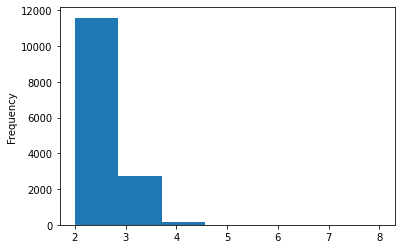

In [38]:
#теперь скорректируем остальные столбцы, начнем с параметра ceiling_height


data['ceiling_height'].value_counts() 
low_ceiling = data['ceiling_height'] <= 2.3
high_ceiling = data['ceiling_height'] >= 3
data['ceiling_height'].plot(y = 'high_ceiling', x = 'low_ceiling', kind = 'hist', bins = 7, range=(2,8))

#достаточно стандартные параметры, но есть несколько уникальных

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height']).median()

In [39]:
#проверяем данные на пропуски:

data.isna().sum()     
    

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Оставшиеся столбцы с пропусками, можно разделить по тематике:

- Площади объектов: 'living_area' и 'kitchen_area' в процессе работы мы будем видеть медианное значение их показателей и тогда выясним мешают ли пропуски.

- Картографические данные: 'locality_name','airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest' здесь могут быть разные причины пропусков: как отсутствие параметра у объекта, так и технический или человеческий факторы. Пока их трогать не будем, но зная об их наличии будем контролировать показатели.

In [40]:
#Изучим уникальные значения столбца locality_name

data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [41]:
#заменим некоторые символы и значения, чтобы сделать столбец более читаемым:

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [42]:
to_replace = {
     r'(\b)городской поселок(\b)':r'\1ПГТ\2',
     r'(\b)поселок городского типа(\b)':r'\1ПГТ\2',
     r'(\b)поселок при железнодорожной станции(\b)':r'\1поселок при ЖД станции\2',
     r'(\b)садоводческое некоммерческое товарищество(\b)':r'\1садовое товарищество\2',
     r'(\b)коттеджный поселок(\b)':r'\1КП\2'}
data['locality_name'].replace(to_replace, regex=True)

data['locality_name'] = data['locality_name'].replace(to_replace, regex=True).str.lower()

In [43]:
#прорверим изменения - данные столбца стали однородными и легче читаются

data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'пгт янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'пгт красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'пгт лебяжье', 'пгт сиверский',
       'поселок молодцово', 'пгт кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'пгт ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновый бор', 

### Посчитаем и добавьте в таблицу новые столбцы

In [44]:
#дополним таблицу новыми столбцами: со стоимостью м кв; днем недели, месяцом и годом публикации:

data['cost_square_meter'] = data['last_price'] / data['total_area']

data['day_of_publication'] = data['first_day_exposition'].dt.weekday

data['month_of_publication'] = data['first_day_exposition'].dt.month

data['year_of_publication'] = data['first_day_exposition'].dt.year

In [45]:
#категоризуем этажи функцией:

def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другие'
    
data['floor_category'] = data.apply(floor_category, axis = 1)


In [46]:
#рассчитаем расстояние от центра города в километрах и обновим информацию в столбце cityCenters_nearest:
import numpy as np

data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).apply(np.floor)

# Исследуем данные и сделаем выводы о состоянии рынка, а именно объектов на нем представленных.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

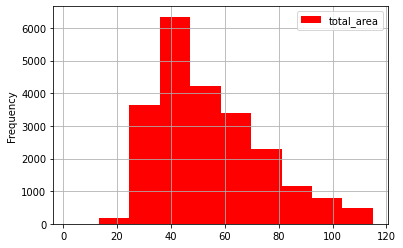

In [47]:
#Проведем исследовательский анализ параметров объектов. Общая площадь объектов: 

data.plot(y = 'total_area',kind = 'hist', bins = 10, range = (2,115), grid=True, figsize = (6,4), color = 'red')
data['total_area'].describe()

На графике мы видим, что большая масса объектов приходится на площадь до 100 квм, но есть и объекты площадью выше и их достаточно. 
А также, есть и объекты площадью от 300 и выше метров, что можно отнести к нерегулярным т.к. их количество невелико. 

Таким образом, очевидно, что квартиры средних размеров общей площадью около 40 метров являются явными лидерами рынка.
Студии, малогабаритные квартиры до 20 кв м и крупногабаритные квартиры более 80 кв м - являются скорее уникальными предложениями

count    21421.0
mean        11.0
std          6.0
min          1.0
25%          7.0
50%          9.0
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

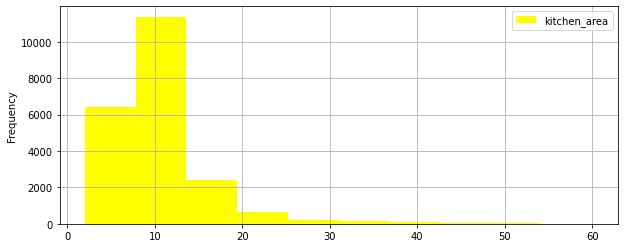

In [48]:
#Площадь кухни: 

data.plot(y = 'kitchen_area',kind = 'hist', bins = 10, range = (2,60), grid=True, figsize = (10,4), color = 'yellow')
data['kitchen_area'].describe().round() #округлим площадь для лучшего восприятия 

Мы видим, что средний метраж кухонь составляет от 1 метра (вероятно это студии) до 20 метров. Объектов с кухнями от 20 до 40 метров также достаточно. Объектов с кухнями больше 40 метров значительно меньше, но они тоже есть. Максимальная площадь кухни составила 112 м кв.

То есть получается, что основное предпочтение отдается объектам с кухнями площадью, примерно, 10 метров кв

count    21796.0
mean        34.0
std         22.0
min          2.0
25%         19.0
50%         30.0
75%         42.0
max        410.0
Name: living_area, dtype: float64

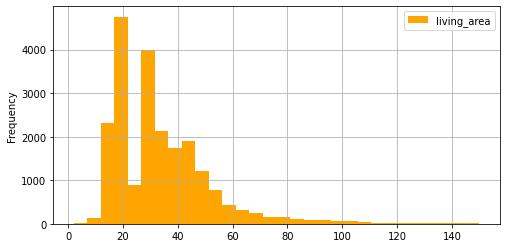

In [49]:
#Жилая площадь: 

data.plot(y = 'living_area',kind = 'hist', bins = 30, range = (2,150), grid=True, figsize = (8,4), color = 'Orange')
          
data['living_area'].describe().round()          

Здесь мы видим, что жилая площадь в объектах начинается с 2х метров, скорее всего это ошибка. 

В среднем жилая площадь 
составляет около 35 метров. Но также, встречаются и крупногабаритные объекты с жилой площадью свыше 100 метров.

Здесь также очевидно, что явный перекос в сторону жилой площади около 20 кв м, что соответствует предыдущим выводам и подтверждает гипотезу о лидерстве на рынке объектов средней величины. 

count    23699.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: ceiling_height, dtype: float64

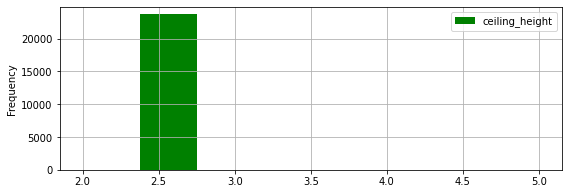

In [50]:
#Изучим высоту потолков объектов:

data.plot(y = 'ceiling_height', kind = 'hist', bins = 8, range = (2,5), grid=True, figsize = (9,3), color = 'green')
data['ceiling_height'].describe().round()

Большая часть объектов имеет стандартную высоту потолков, около 2,7 м

count    23699.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

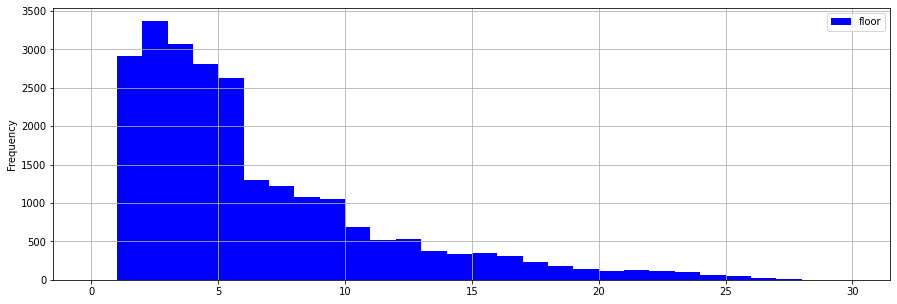

In [51]:
#Этаж объекта:

data.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,30), grid=True, figsize = (15,5), color = 'blue')
data['floor'].describe().round()

Основная масса объектов расположена в пределах до 5 этажа. 

Совершенно очевидно, что большая часть объектов расположена на нижних этажах - до 5го.
Объекты от 5го до 10го наименее популярны но их тоже достаточно. 
Объекты же на этажах от 10 и выше существенно уступают по количеству на рынке.

count      23616
unique         3
top       другие
freq       17363
Name: floor_category, dtype: object

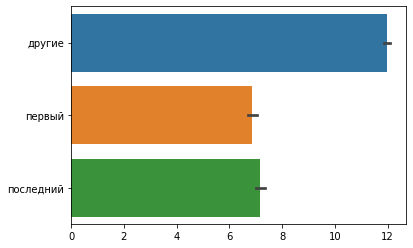

In [52]:
#Тип этажа квартиры:

import seaborn

for_x = data['floors_total'].tolist()
for_y = data['floor_category'].tolist()

seaborn.barplot(x = for_x,y = for_y)

data['floor_category'].describe()

Очевидно, что в объявлениях преобладают объекты не на первом и последнем этажах

count    23699.000000
mean        10.635090
std          6.616396
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

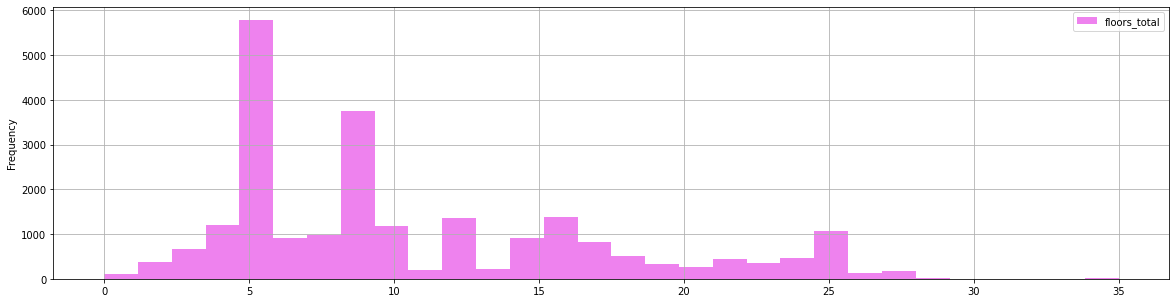

In [53]:
#Количество этажей в доме:

data.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (0,35), grid=True, figsize = (20,5), color = 'violet')
data['floors_total'].describe()

Лидеры рынка - пятиэтажки. Собственно это объясняет почему максимум рынка расположен ДО 5 этажа. 

Малоэтажное строительство (до 3 эт.) и высокоэтажные объекты от 16ти эт. очевидно не очень популярны. Есть скачок среди 25 этажных объектов, но он безусловно уступает объектам от 5 до 8 этажей

Также видим аномальное значение 0 - что не может быть, соответственно относим его к пропускам которые были в исходных данных

count    18180.0
mean     13695.0
std       8611.0
min          0.0
25%       9000.0
50%      13000.0
75%      16000.0
max      65000.0
Name: cityCenters_nearest_m, dtype: float64

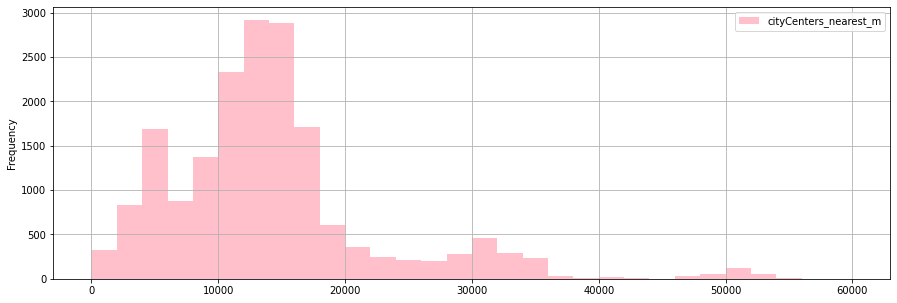

In [54]:
#Расстояние в метрах до центра города: 

import numpy as np

data['cityCenters_nearest_m'] = (data['cityCenters_nearest']*1000).apply(np.floor)

data.plot(y = 'cityCenters_nearest_m', kind = 'hist', bins = 30, range = (0,60000), grid=True, figsize = (15,5), color = 'pink')
data['cityCenters_nearest_m'].describe().round()  

В пределах КАД, радиус Санкт - Петербурга составляет 32 км, таким образом основная масса объектов расположена в этой черте. 
Максимальная точка графика - указывает на расстояние 10 000 м от центра, то есть спасльные районы, расположенные вокруг центра СПб. 
Но часть пригородов выходящих за пределы, так же может являться частью СПб, а не Лен. областью

Таким образом по типам распределения мы видим:

Лидер - дальность от центра около 15 км -то есть это спальные районы в пределах КАД
Средний показатель - около 7 км от центра это категория которую можно отнести к "престижной", то есть вероятно речь идет об объектах бизнес-класса и выше, а также о намывных территориях Васильевского острова. 
От 30 км видим спад, но здесь нужно учитывать сокращение оъектов многоквартирных и увеличение частного сектора, где меняются и общие показатели оличающиеся от основной вырисовывающейся гипотезы "среднегабаритного жилья"

count    18157.000000
mean        28.279451
std         12.636555
min          0.000000
25%         18.000000
50%         26.000000
75%         37.000000
max         84.000000
Name: airports_nearest, dtype: float64

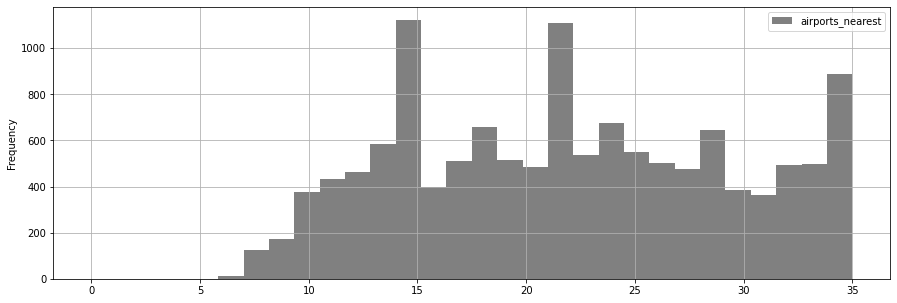

In [55]:
#Расстояние объекта до ближайшего аэропорта:

import numpy as np

data['airports_nearest'] = (data['airports_nearest']/1000).apply(np.floor) #переведем в километры

data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, range = (0,35), grid=True, figsize = (15,5), color = 'grey')

data['airports_nearest'].describe()

Согласно общим данным, две пиковые точки объектов находятся на расстоянии 15 и примерно 22 км от аэропорта Пулково. 

Нельзя утверждать, что это дальность от центра или спальных районов в черте КАД, также в список могут войти Пушкин, Павловск и другие населенные пункты входящие в черту СПб.

Как мы видим распределение следующее:

-Минимум это удаленность от аэропорта примерно 6 км, такое может быть тк разрешены постройки начиная от 3 км от аэропорта. 
- Средние точки находятся примерно на расстоянии 18 и 24 км от аэропорта - их сложно логически связать, вероятно это обусловленно плотностью застройки определенных районов
- максимальная дальность 15 и примерно 22 км, что все же подтверждает увеличение рынка в более тихих районах.

count    8079.0
mean      491.0
std       342.0
min         1.0
25%       288.0
50%       455.0
75%       612.0
max      3190.0
Name: parks_nearest, dtype: float64

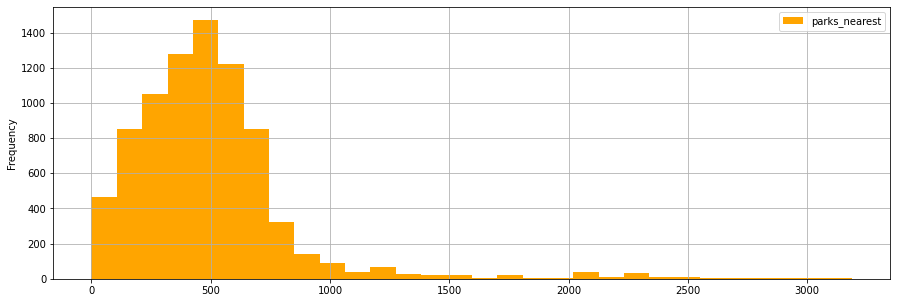

In [56]:
#Расстояние объектов до ближайших парков:

data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, range = (0,3190), grid=True, figsize = (15,5), color = 'orange')

data['parks_nearest'].describe().round()

Здесь можно сделать следующий вывод:

- Максимальная точка находится на расстоянии 500 м от объекта до парка, что вполне вероятно.
- Обекты с близостью парка до 500 метров также представлены в довольно значительном количестве, но и объектов с дальностью парков в пределах до 700 метров достаточно много - обе категории можно отнести к среднему показателю
- Минимальные же точки показывают объекты с дальностью от 1 км от парка, имея незначительный рост на показателях 1,8 км; 2,2 км и 2,3км



<AxesSubplot:ylabel='Frequency'>

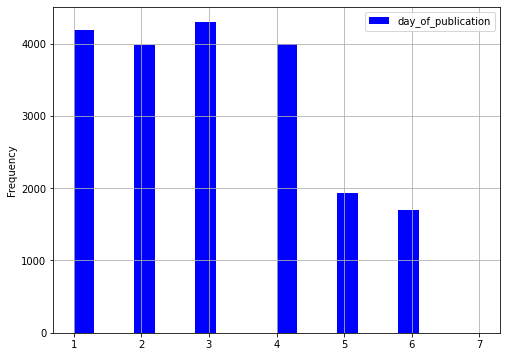

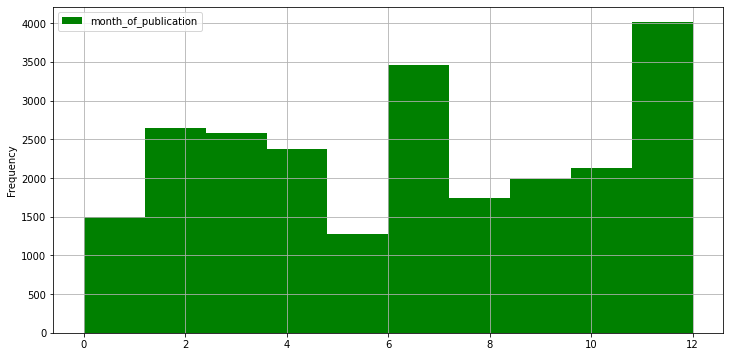

In [57]:
#Наиболее популярные день и месяц для публикации объявлений:

data.plot(y = 'day_of_publication', kind = 'hist', bins = 20, range = (1,7), grid=True, figsize = (8,6), color = 'blue')
data.plot(y = 'month_of_publication', kind = 'hist', bins = 10, range = (0,12), grid=True, figsize = (12,6), color = 'green')


Как мы видим самыми популярными днями размещения являются: понедельник и среда. Также имеет значение четверг - показатель меньше предыдущих но он значительный.
А вот ближе к пятнице люди вероятно думают о выходных, что дает значительное падение публикаций. Также и в субботу. В воскресенье и вовсе большинству не до объявлений.

Что касается месяца, то к концу года наблюдается увеличение предложений. Начало года и конец весны имеют явный спад. Это может быть обусловлено следующими факторами:

Январь это посленовогодний период, когда многие еще заняты предыдущими праздничными расходами. Тем более многие пользуютс каникулами для отъезда.

Февраль, март и апрель - показывают рост рынка, который снижается в мае, что возможно также обусловлено длянными каникулами и массовыми отъездами.

Июнь и июль показывают резкий рост - возможно летнее время и отпуск многие используют для последующего после покупки недвижимости ремонта или более свободных просмотров объектов.

Август - ноябрь заметен спокойный и стабильный рост

Декабрь  - показывает резкий скачок, возможно это можно связать с традиционным ростом кредитных предложений в конце года.

In [58]:
#Как быстро продавались квартиры с момента публикации:

data['days_exposition'].describe().round()

count    23699.0
mean       157.0
std        214.0
min          0.0
25%         22.0
50%         74.0
75%        199.0
max       1580.0
Name: days_exposition, dtype: float64

157.0
74.0


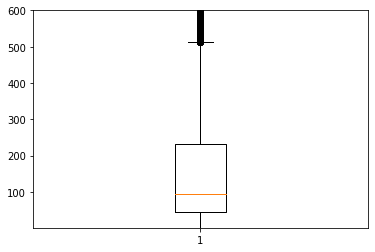

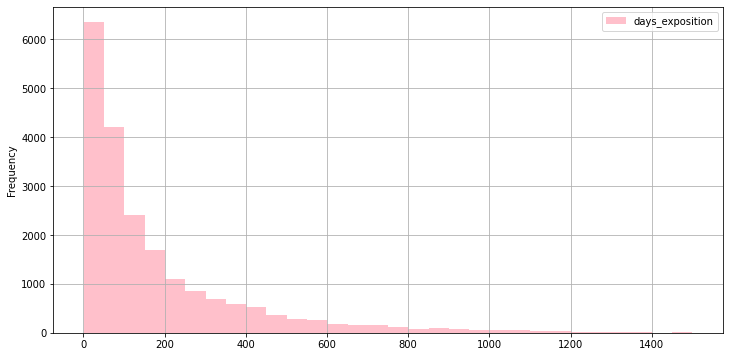

In [59]:
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,600)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1500),figsize = (12,6), color = 'pink')


print(data['days_exposition'].mean().round()) 
print(data['days_exposition'].median()) 

Поскольку медианное значение вдвое выше среднего, можно отнести это к наличию лидеров значений - слишком длительный срок (1580 дней) или слишком короткий (0 дней)

Чтобы получить более точные данные "зачистим данные" от анамальных значений.

45     880
60     538
7      234
30     208
90     204
      ... 
247     13
242     12
243     10
2        3
1        1
Name: days_exposition, Length: 250, dtype: int64

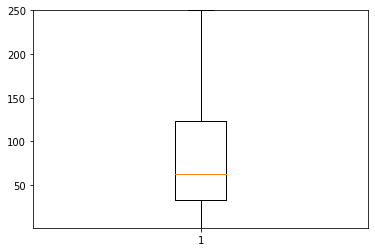

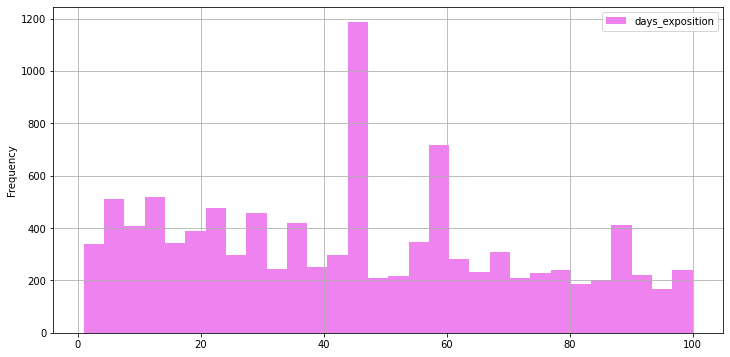

In [60]:
days_exposition_correct = data.query('days_exposition != 1400 and days_exposition != 0 and days_exposition <= 250')


plt.boxplot(days_exposition_correct['days_exposition'])
plt.ylim(1,250)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,100),figsize = (12,6), color = 'violet')

days_exposition_correct['days_exposition'].value_counts()


Мы косвенно подтвердили полученные ранее данные и убедились, что средний срок актуальности объявления составил - около 45 дней.

Но более детально можно увидеть, что:

- Основная масса публикаций не превышает 45 дней, это вполне хороший показатель и это можно отнести -  быстрым продажам
- Средние значения относятся к показателям до 90 дней. По сути, продажа объекта в период до трех месяцев - это неплохой результат. 
- В пике до 10 дней могут встретиться недостоверные значения то есть 0 заглушка пропусков. 
- Показатели свыше 100 дней стремятся к уменьшению. Возможно речь идет о "забытых" объявлениях или о сложных объектах

Но поскольку мы прибегаем к методу построения boxplot то, только подтверждаем увиденное на гистограмме: вбросы отсутствуют массово, есть редкие значения но их не так много. Медиана же подтверждает мысль о том, что 50 это самый популярны срок публикации, совсем немного его сдвигает к увеличению показатель 60 дней. 

0.6536750579657242

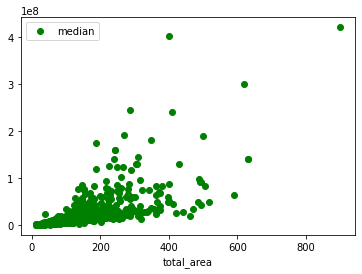

In [61]:
#Как на стоимость объекта влияет общая площадь:

total_area_pt = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
total_area_pt.columns = ['mean', 'count', 'median']
total_area_pt.plot(y = 'median', style = 'o', color = 'green')

total_area_pt.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])



Корреляция Пирсона положительная, и превышает 0,5 а значит стоит считать, что размер объекта  влияет на его стоимость.

0.5664915336952651

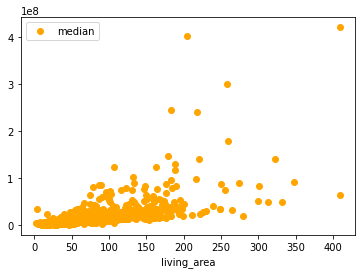

In [62]:
#Как на стоимость объекта влияет его жилая площадь:

living_area_pt = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
living_area_pt.columns = ['mean', 'count', 'median']
living_area_pt.plot(y = 'median', style = 'o', color = 'orange')

living_area_pt.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

Здесь корреляция еще ниже, предыдущего примера но она тоже выше, чем 0.5. Делаем вывод, что жилая площадь также влияет на стоимость объекта.

0.5198690130216392

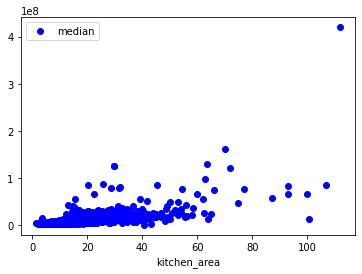

In [63]:
#Как на стоимость объекта влияет площадь кухни:

kitchen_area_pt = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
kitchen_area_pt.columns = ['mean', 'count', 'median']
kitchen_area_pt.plot(y = 'median', style = 'o', color = 'blue')

kitchen_area_pt.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Говорят, что женщина в среднем проводит 18 лет совей жизни на кухне. Возможно поэтому покупатели хотят иметь вместительные кухни. И соответственно здесь лучше учесть влияние на стоимость объекта в целом.

0.3633428499648948

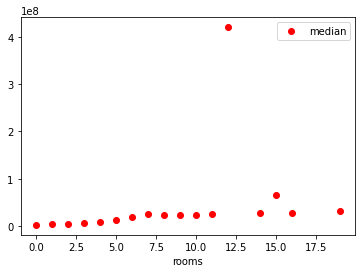

In [64]:
#Как на стоимость объекта влияет количество комнат:

rooms_pt = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms_pt.columns = ['mean', 'count', 'median']
rooms_pt.plot(y = 'median', style = 'o', color = 'red')

rooms_pt.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Количество комнат не так сильно учитывается при определении стоимости объекта. Вероятно, потому что отталкивается от стоимости м кв, а не от этого параметра.

In [70]:
#Как на стоимость объекта влияет этаж на котором он расположен:

for_y = data['floor_category'].tolist()

# floor_category_pt = data.pivot_table(index = for_y, values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# floor_category_pt.columns = ['mean', 'count', 'median']
# floor_category_pt.plot(y = 'median')

# floor_category_pt.sort_values('median', ascending = False)

# data['floor_category'].corr(data['last_price'])


label_encoder = LabelEncoder()

data['floor_category_encoded'] = label_encoder.fit_transform(data['floor_category'])

correlation = data['floor_category_encoded'].corr(data['last_price'])

correlation

0.0026375725993058206

In [71]:
data.drop('floor_category_encoded', axis=1, inplace=True)

,mean,count,median
day_of_publication,,,
1,6394233.0,4183,4730000
2,6627970.0,3974,4700000
0,6511613.0,3612,4650000
3,6708663.0,4295,4650000
4,6372131.0,4000,4585000
5,6976804.0,1936,4555000
6,6246180.0,1699,4550000


,mean,count,median
month_of_publication,,,
4,6737198.0,2379,4800000
9,6825470.0,1981,4700000
11,6461363.0,2371,4700000
12,7011731.0,1641,4700000
2,6468500.0,2640,4650000
3,6359275.0,2587,4650000
7,6649337.0,1695,4650000
1,6668233.0,1500,4600000
8,6350233.0,1744,4570000


,mean,count,median
year_of_publication,,,
2014,12087136.0,137,7700000
2015,8572833.0,1191,5350000
2019,6782388.0,2879,5050000
2016,6827912.0,2783,4550000
2018,5950966.0,8519,4550000
2017,6585729.0,8190,4500000


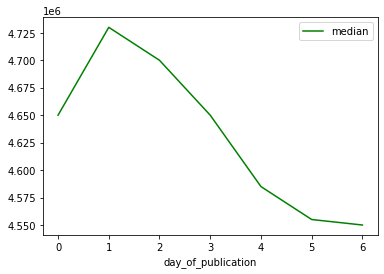

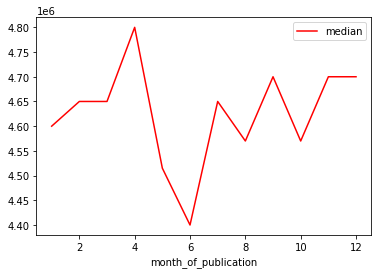

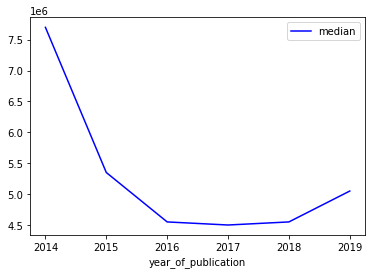

In [72]:
#Как на стоимость объекта влияет дата размещения объявления (день недели, месяц, год):

day_of_publication_pt = data.pivot_table(index = 'day_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
day_of_publication_pt.columns = ['mean', 'count', 'median']
day_of_publication_pt.plot(y = 'median',color = 'green')

display(day_of_publication_pt.sort_values('median', ascending = False).round())


month_of_publication_pt = data.pivot_table(index = 'month_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_of_publication_pt.columns = ['mean', 'count', 'median']
month_of_publication_pt.plot(y = 'median', color = 'red')

display(month_of_publication_pt.sort_values('median', ascending = False).round())



year_of_publication_pt = data.pivot_table(index = 'year_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_of_publication_pt.columns = ['mean', 'count', 'median']
year_of_publication_pt.plot(y = 'median',color = 'blue')

display(year_of_publication_pt.sort_values('median', ascending = False).round())


День публикации - объекты опубликованные в начале недели (максимум до среды) продаются быстрее
Месяц публикации - самую высокую точку имеют объекты апреля - а рост и стабильность показывают объекты ноября и декабря
После 2014 года наблюдается откровенный кризис рынка, но последующий начальный рост в 2019 году


In [73]:
#Средняя стоимость одного кв м населенных пунктов с максимальным количеством объявлений:

locality_name_pt = data.pivot_table(index = 'locality_name', values = 'cost_square_meter', aggfunc=['count', 'mean'])
locality_name_pt.columns = ['count', 'mean']
locality_name_pt = locality_name_pt.sort_values('count', ascending = False).head(10)


display(locality_name_pt[locality_name_pt['mean']==locality_name_pt['mean'].max()]) #максимальная стоимость составляет

display(locality_name_pt[locality_name_pt['mean']==locality_name_pt['mean'].min()]) #минимальная стоимость составляет

,count,mean
locality_name,,
санкт-петербург,15721,114849.008794


,count,mean
locality_name,,
выборг,237,58141.909153


Лидером стоимости за 1 кв м стал Санкт - Петербург, средняя цена по рынку за исследуемый период составила 114 850 руб., а Выборг стал самым доступным, показав стоимость 58 150 руб.

In [77]:
#Средняя стоимость каждого километра до центра, объектов в СПб:

# data['cityCenters_km_price'] = data['cityCenters_nearest']
# data['cityCenters_km_price'] = data['cityCenters_km_price'].fillna(999999)
# data['cityCenters_km_price'] = data['cityCenters_km_price'].astype('int')
# km_price_pt = data.query('locality_name == "Санкт-Петербург" and cityCenters_km_price != 999999').pivot_table(index = 'cityCenters_km_price', values = 'cost_square_meter', aggfunc = 'mean')
# km_price_pt.plot(color = 'orange')

spb_data = data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_km_price'] != 999999)]
km_price_pt = spb_data[spb_data['cityCenters_km_price'] != 999999].groupby('cityCenters_km_price')['cost_square_meter'].mean()

data['cityCenters_km_price'].describe()

count     23699.000000
mean     232889.297186
std      422668.513575
min           0.000000
25%          10.000000
50%          14.000000
75%          35.000000
max      999999.000000
Name: cityCenters_km_price, dtype: float64

### Общий вывод

Изучив представленные данные можно сделать следующие выводы:

Некоторые данные нуждались в доработке. С этой целью, были очищены от анамальных значений и пропусков одни столбцы и добавлены другие столбцы с уточняющей информацией, например: 

* 'cost_square_meter' - рассчет стоимости м кв

* 'day_of_publication' - день недели публикации

* 'month_of_publication' - месяц публикации

* 'year_of_publication' - год публикации

Исследование характеристик объектов показало, что большая часть объектов имеет:

Высота потолков  стандартная - около 2,7 м
Общая площадь до 100 м кв
Площадь кухни от 20 до 40 м кв
Жилая площадь около 35 м кв
Чаще всего объект расположен на среднем этаже
Объект расположен в радиусе 10 км от центра
Примерно в 18.5 км от аэропорта
В пределе 500 м до ближайшего парка 


Статистика размещения объявлений показала, что:

В понедельник и среду чаще всего публикуют объявления
В конце года значительный рост предложений
Начало года и конец весны имеют явный спад
Средний срок актуальности объявления составил - около 50 дней

А также:

Что жилая площадь также влияет на стоимость объекта
Покупатели хотят иметь вместительные кухни. И готовы доплатить за это
Количество комнат не влияет на общую стоимость объекта
Городом с самым большим количеством объявлений является: Выборг

